In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Description of the data set 


In [3]:
data = pd.read_csv('CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<font face="Arial" size="4" color="blue">
We have a dataset describing the model, the company which manufactured the car, number of cylinders, fuel consumption etc. 
We have to predict the CO2 emission based on the above independent variables 
    </font>

In [6]:
data.count()-7385

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

<font face="Arial" size="4" color="blue">
The above states that there are no null values in our dataset.
    </font>

In [8]:
# dropping the unnecessary columns 
# see all the columns 
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [11]:
data.drop('Fuel Consumption Comb (mpg)', axis =1, inplace =True)

In [12]:
columns_to_drop = ['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']
data.drop(columns_to_drop, axis = 1, inplace = True)

In [13]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


<font face="Arial" size="4" color="Blue">
Analysing with visualisation tools
    </font>

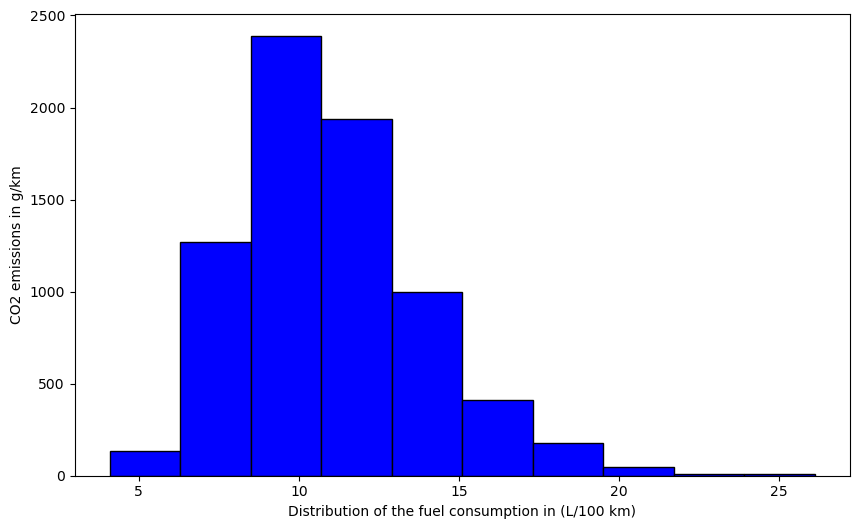

In [23]:
plt.figure(figsize=(10,6))
plt.hist(data['Fuel Consumption Comb (L/100 km)'], color='blue',edgecolor='black',bins=10)
plt.ylabel('CO2 emissions in g/km')
plt.xlabel('Distribution of the fuel consumption in (L/100 km)')
plt.show()

<font face="Arial" size="4" color="black">
The fuel consumption rate between 6-13 L/100Km shows higher emissions of CO2
 </font>

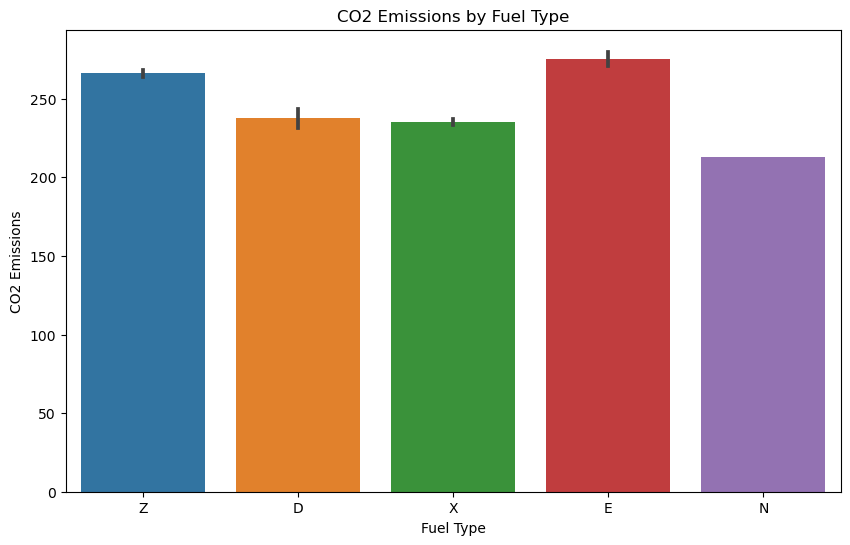

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=data)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.show()

In [26]:
drop_col=['Make','Model']
data.drop(drop_col,axis=1,inplace =True)

In [28]:
data.drop('Transmission', axis=1, inplace=True)

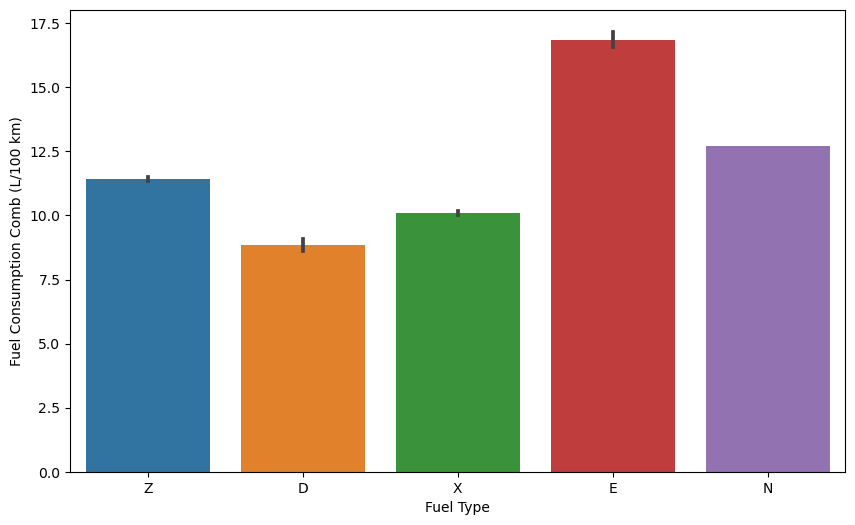

In [27]:
#fuel type and fuel consumption 
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=data)
plt.title('')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.show()

<font face="Arial" size="4" color="black">
We can observe that fuel type 'E' has the highest fuel consumption and also highest CO2 emission rate. But type D has higher fuel consumption but doesn't contribute to much significant CO2 emission.
    </font>

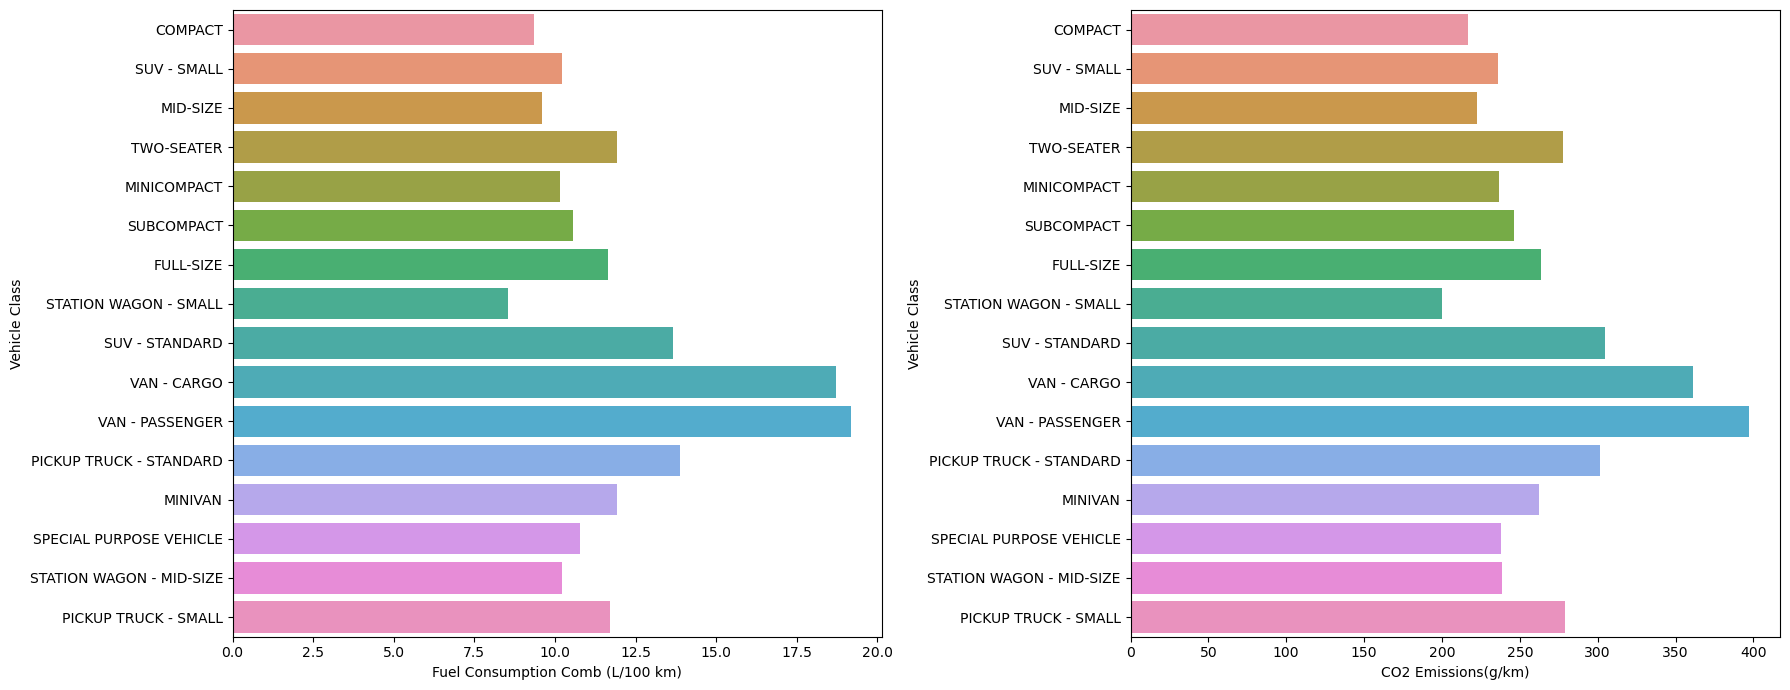

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# First plot
sns.barplot(ax=axes[0], y='Vehicle Class', x='Fuel Consumption Comb (L/100 km)', data=data,ci=None)
axes[0].set_ylabel('Vehicle Class')
axes[0].set_xlabel('Fuel Consumption Comb (L/100 km)')

# Second plot
sns.barplot(ax=axes[1], y='Vehicle Class', x='CO2 Emissions(g/km)', data=data,ci=None)
axes[1].set_ylabel('Vehicle Class')
axes[1].set_xlabel('CO2 Emissions(g/km)')

# Adjust layout
plt.tight_layout()
plt.show()

<font face='Arial' color='black' size='3'>
'VAN PASSENGER' has the highest fuel consumption rate as well as CO2 emission rate </font>


<font face="Arial" size="4" color="blue">
Understanding the relation between multiple features 
</font>

In [31]:
# one hot encoding for 'fuel type' column
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.get_dummies(data=data, columns=['Fuel Type'])
data.head()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,COMPACT,2.0,4,8.5,196,False,False,False,False,True
1,COMPACT,2.4,4,9.6,221,False,False,False,False,True
2,COMPACT,1.5,4,5.9,136,False,False,False,False,True
3,SUV - SMALL,3.5,6,11.1,255,False,False,False,False,True
4,SUV - SMALL,3.5,6,10.6,244,False,False,False,False,True


In [39]:
# not using vehicle-class to model the data using regression
data.drop('Vehicle Class', axis=1, inplace=True)

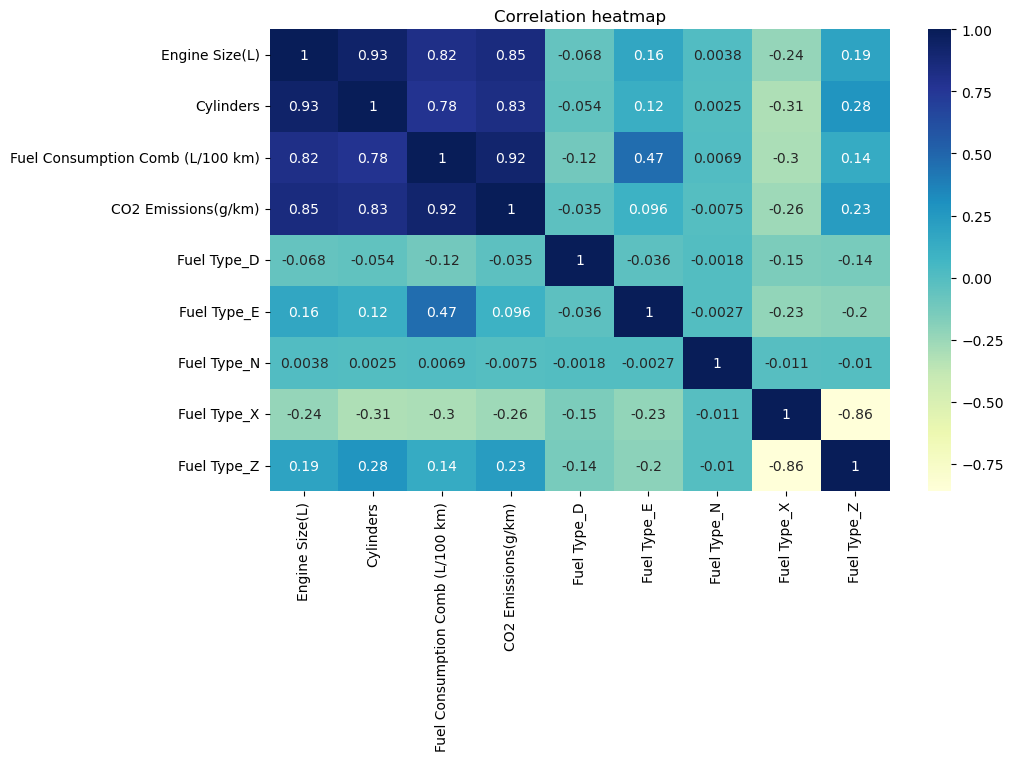

In [43]:
# understanding the correlation between all the features we are going to use for regression
plt.figure(figsize=(10,6))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linecolor='black')
plt.title('Correlation heatmap')
plt.show()

In [44]:
data.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,False,False,False,False,True
1,2.4,4,9.6,221,False,False,False,False,True
2,1.5,4,5.9,136,False,False,False,False,True
3,3.5,6,11.1,255,False,False,False,False,True
4,3.5,6,10.6,244,False,False,False,False,True


<font face='Arial' color='red' size='3'>
The highest correlation is seen between Cylinders and Engine size followed by CO2 emissions and fuel consumption
More relavent conclusions can be drawn form the above map.
    </font>

In [50]:
# we are working with only numerical values
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# splitting my data into train and test data

X = data[['Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)','Fuel Type_D', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']]
y= data['CO2 Emissions(g/km)']
X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',y_test.shape)
print('shape of X_test',X_test.shape)

shape of X_train (6646, 8)
shape of y_train (6646,)
shape of y_test (739,)
shape of X_test (739, 8)


In [51]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
# predicting on train data
y_pred_train = model.predict(X_train)

# predicting on test data 
y_pred_test = model.predict(X_test)

In [55]:
r2 = r2_score(y_test, y_pred_test)
print("R² score:", r2)

R² score: 0.9904229321133593


<font face='Arial' color='red' size='5'>
    MODEL ACCURACY IS 99.04%
    </font>

In [58]:
results = pd.DataFrame({'Actual CO2 Emissions (g/km)': y_test, 'Predicted CO2 Emissions (g/km)': y_pred_test})
results.to_csv('predictions_CO2.csv', index=False)

In [59]:
predictions = pd.read_csv('predictions_CO2.csv')
predictions.head()

,Actual CO2 Emissions (g/km),Predicted CO2 Emissions (g/km)
0,253,254.140244
1,344,340.543811
2,322,325.501167
3,297,296.026275
4,308,305.571416


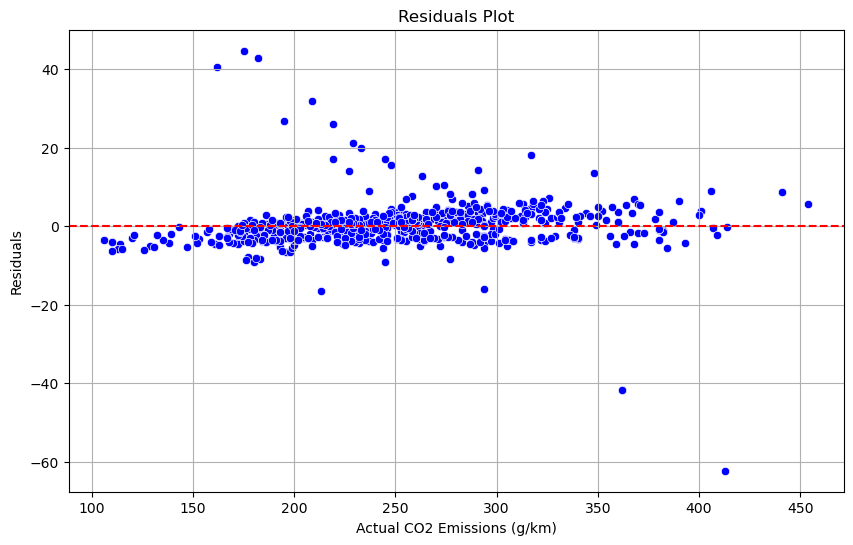

In [62]:
results['Residuals'] = results['Actual CO2 Emissions (g/km)'] - results['Predicted CO2 Emissions (g/km)']

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual CO2 Emissions (g/km)', y='Residuals', data=results, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals Plot')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()